In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder,RobustScaler
from sklearn.metrics import confusion_matrix
import pandas as pd

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso, Ridge
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing  import FunctionTransformer
np.set_printoptions(precision=3, suppress=True)
import warnings
warnings.filterwarnings("ignore")

In [7]:
dataset=pd.read_csv("us_constructions.csv")
X,y= dataset.iloc[:, :-1], dataset.iloc[:, -1]
X.shape

(6170627, 46)

In [9]:
X

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight
0,C-1,4,2019-04-05 16:00:00.000000000,2020-09-29 11:53:57.000000000,32.838360,-93.152378,32.850740,-93.164388,1.103497,Construction on LA-534 WB near EDMONDS LOOP Ro...,...,False,False,False,False,False,False,False,Day,Day,Day
1,C-2,2,2021-11-12 07:59:00.000000000,2021-11-12 08:22:30.000000000,30.221331,-92.008625,30.216642,-92.003809,0.433173,Slow traffic on US-90 E from US-167/Louisiana ...,...,False,False,False,False,False,False,False,Day,Day,Day
2,C-3,2,2021-10-12 07:17:30.000000000,2021-10-12 09:18:55.000000000,39.653153,-104.910224,39.653120,-104.913838,0.192266,Slow traffic on CO-30 from S Tamarac Dr (E Ham...,...,False,False,True,False,False,False,False,Day,Day,Day
3,C-4,4,2021-02-10 02:46:10.000000000,2021-02-17 23:59:00.000000000,33.961506,-118.029339,33.961919,-118.029082,0.032112,Closed road from Whittier to College Ave due t...,...,False,False,False,False,False,False,False,Night,Night,Night
4,C-5,2,2020-09-24 15:58:00.000000000,2020-09-25 21:04:54.000000000,40.008734,-79.599696,40.022822,-79.595703,0.996057,Construction on US-119 NB near SAMPSON ST Allo...,...,False,False,False,False,False,False,False,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6170622,C-6293072,2,2020-01-10 10:39:00,2021-10-19 01:02:59,40.136791,-74.962677,40.128850,-74.969085,0.644691,Roadwork on US 1 southbound between Exit 351: ...,...,False,False,False,False,False,False,False,Day,Day,Day
6170623,C-6293073,2,2020-01-29 21:00:00,2020-01-30 05:00:00,37.806690,-122.474869,NaN,NaN,3.040000,Two lanes closed due to construction on US-101...,...,False,False,False,False,False,False,False,Night,Night,Night
6170624,C-6293074,2,2021-09-04 10:54:51,2021-09-04 15:06:46,40.758288,-73.994419,40.758568,-73.992984,0.077554,Slow traffic from Lincoln Tunl W to 9th Ave du...,...,False,False,True,False,False,True,False,Day,Day,Day
6170625,C-6293075,2,2021-12-07 16:15:49,2021-12-07 18:34:49,29.698476,-95.427386,29.697288,-95.425727,0.129042,Stationary traffic at Aberdeen Way due to road...,...,False,False,False,True,False,False,False,Day,Day,Day


In [10]:
y.head()

0      Day
1      Day
2      Day
3    Night
4      Day
Name: Astronomical_Twilight, dtype: object

In [12]:
X.isna().sum()

ID                         0
Severity                   0
Start_Time                 0
End_Time                   0
Start_Lat                  0
Start_Lng                  0
End_Lat               634048
End_Lng               634048
Distance(mi)               0
Description                0
Number               2674829
Street                     6
Side                       0
City                     288
County                     0
State                      0
Zipcode                 2344
Country                    0
Timezone                5106
Airport_Code           15859
Weather_Timestamp      83786
Temperature(F)        115394
Wind_Chill(F)         776566
Humidity(%)           122560
Pressure(in)          104318
Visibility(mi)        142246
Wind_Direction        162549
Wind_Speed(mph)       340277
Precipitation(in)     922444
Weather_Condition     138203
Amenity                    0
Bump                       0
Crossing                   0
Give_Way                   0
Junction      

In [13]:
X_num=X.loc[:,["Precipitation(in)", "Wind_Chill(F)"]]
imp_median = SimpleImputer(strategy='median')
X_num.iloc[:,:]=imp_median.fit_transform(X_num.iloc[:,:])
X_num.isna().sum()

Precipitation(in)    0
Wind_Chill(F)        0
dtype: int64

In [14]:
sc=StandardScaler()

X_num.iloc[:,:]=sc.fit_transform(X_num.iloc[:,:])
X_num

,Precipitation(in),Wind_Chill(F)
0,-0.038827,0.659153
1,-0.038827,-0.395385
2,-0.038827,-1.555378
3,-0.038827,-0.448112
4,-0.038827,0.553699
...,...,...
6170622,-0.038827,-1.133562
6170623,-0.038827,-0.448112
6170624,-0.038827,0.448246
6170625,-0.038827,0.237338


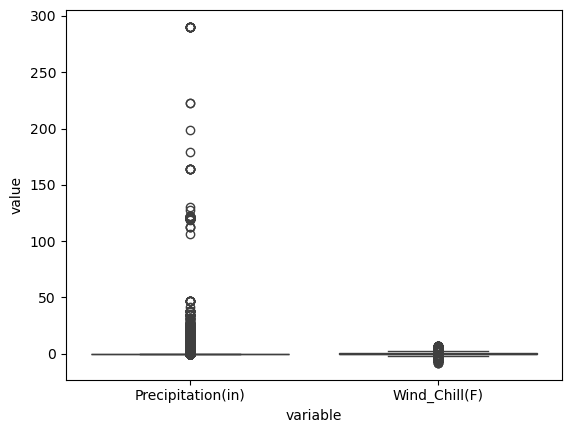

In [15]:
sns.boxplot(x="variable", y="value", data=pd.melt(X_num))

plt.show()

In [16]:
Outliers=X_num[(~X_num["Precipitation(in)"].between(-50,50)) | (~X_num["Wind_Chill(F)"].between(-50,50))]
Outliers.count()

Precipitation(in)    312
Wind_Chill(F)        312
dtype: int64

In [17]:
X_num=X_num[(X_num["Precipitation(in)"].between(-50,50)) & (X_num["Wind_Chill(F)"].between(-50,50))]
X_num

,Precipitation(in),Wind_Chill(F)
0,-0.038827,0.659153
1,-0.038827,-0.395385
2,-0.038827,-1.555378
3,-0.038827,-0.448112
4,-0.038827,0.553699
...,...,...
6170622,-0.038827,-1.133562
6170623,-0.038827,-0.448112
6170624,-0.038827,0.448246
6170625,-0.038827,0.237338


In [25]:
X_cat=X.loc[:,["Sunrise_Sunset", "Civil_Twilight"]]

onehotenc=OneHotEncoder(sparse_output=False,handle_unknown='ignore')

X_cat_emb=onehotenc.fit_transform(X_cat.loc[:,["Sunrise_Sunset"]])
one_hot_df = pd.DataFrame(X_cat_emb, columns=onehotenc.get_feature_names_out(["Sunrise_Sunset"]))

df_encoded = pd.concat([X_cat, one_hot_df], axis=1)

df_encoded = df_encoded.drop(["Sunrise_Sunset"], axis=1)
df_encoded 

,Civil_Twilight,Sunrise_Sunset_Day,Sunrise_Sunset_Night,Sunrise_Sunset_nan
0,Day,1.0,0.0,0.0
1,Day,1.0,0.0,0.0
2,Day,1.0,0.0,0.0
3,Night,0.0,1.0,0.0
4,Day,1.0,0.0,0.0
...,...,...,...,...
6170622,Day,1.0,0.0,0.0
6170623,Night,0.0,1.0,0.0
6170624,Day,1.0,0.0,0.0
6170625,Day,1.0,0.0,0.0


In [26]:
df_encoded['Civil_Twilight']=df_encoded.Civil_Twilight.map({'Day':0,'Night':1})
df_encoded 

,Civil_Twilight,Sunrise_Sunset_Day,Sunrise_Sunset_Night,Sunrise_Sunset_nan
0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0
3,1.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0
...,...,...,...,...
6170622,0.0,1.0,0.0,0.0
6170623,1.0,0.0,1.0,0.0
6170624,0.0,1.0,0.0,0.0
6170625,0.0,1.0,0.0,0.0


In [28]:
df_encoded2=SelectPercentile(chi2, percentile=70).fit_transform(df_encoded_imputed, y)
df_encoded2

ValueError: Input contains NaN